# Prática I - Redes Neurais usando Python

## Parte 1 - Construindo uma rede do zero

Redes Neurais constituem uma das técnicas mais populares de Inteligência Computacional. Por mais que esta técnica tenha um potencial para mapeamento de diversos problemas, o conceito básico sobre o seu funcionamento não é impossível de ser entendido.

Nesta primeira parte prática, iremos construir uma Rede Neural do zero. Para uma forma didática, a primeira etapa vai abordar os principais aspectos de Redes Neurais. 

Resolva primeiro a parte teórica do item para resolver em seguida a parte prática.


O esqueleto do modelo de Rede Neural já está pronto. Para uma melhor comodidade, o script já possui os métodos essenciais para o funcionamento, mas os códigos ainda não estão implementados. O objetivo deste trabalho é desenvolver o conhecimento teórico e prático sobre redes neurais, entendendo mais a fundo as suas operações.

In [63]:
import numpy as np
import matplotlib.pyplot as plt

In [64]:
def transform(x,y):
    return x**2 + y**2

In [82]:
!python --version

Python 3.6.13 :: Anaconda, Inc.


In [97]:
class NeuralNetwork():
    def __init__(self,nin,nout,hidden_neurons=[2],hidden_layers=1,activation=['relu']):
        '''
        Classe para a implementação do algoritmo de Redes Neurais para a atividade prática da disciplina Inteligência Computacional Aplicada - PUC-Rio
        
        Variáveis de entrada:
        nin - Quantidade de entradas da Rede (int)
        nout - Quantidade de neurônios na saída da Rede (int)
        hidden_neurons - Quantidade de neurônios na camada escondida. Deve ser uma lista de inteiros positivos.
        hidden_layers - Quantidade de camadas escondidas. (int)
        activation - Função de ativação para cada uma das camadas. Deve ser uma lista de strings.
        
        '''
        
        #Entrada do modelo
        self.input = nin 
        #Saída do modelo
        self.output = nout 
        #Lista de neurônios. Começa a contagem da entrada do modelo.
        self.hn = [nin] + hidden_neurons 
        
        self.hl = hidden_layers

        #Dicionário com todas as possíveis funções de ativação. Caso construa alguma outra, adicione a esta lista.
        self.possible_activations = {'relu':self.relu, 'tanh':np.tanh, 'sigmoid':self.sigmoid}

        #Inicialização dos pesos ao criar o novo objeto
        self.initialize_weights(activation)




    def initialize_weights(self,activation):

        #Matriz de pesos 
        self.weights = dict()
        #Vetor de bias
        self.bias = dict()

        #Erros
        self.weights_error = dict()
        self.bias_error = dict()

        #Ativacao do neuronio
        self.neuron_out = dict()
        
        
        self.neuron_net = dict()

        self.activation = dict()




        for i in range(self.hl):
            name = f'hidden{i}'

            self.weights[name] = np.random.rand(self.hn[i+1], self.hn[i])*2 - 1.0
            self.bias[name] = np.zeros((self.hn[i+1],1))

            self.weights_error[name] = np.zeros((self.hn[i+1], self.hn[i]))
            self.bias_error[name] = np.zeros((self.hn[i+1],1))

            self.activation[name] = self.possible_activations[activation[i]]

            self.neuron_out[name] = np.zeros((self.hn[i+1],1))
            self.neuron_net[name] = np.zeros((self.hn[i], 1))


        self.weights['output'] = np.random.rand(self.output, self.hn[-1])*2 - 1.0
        self.bias['output'] = np.zeros((self.output, 1))

        self.weights_error['output'] = np.zeros((self.output, self.hn[-1]))
        self.bias_error['output'] = np.zeros((self.output,1))

        self.activation['output'] = self.possible_activations[activation[-1]]

        self.neuron_out['output'] = np.zeros((self.output,1))

        self.neuron_net['output'] = np.zeros((self.hn[-1],1))

    def insert_layers(self,weights=[],bias=[]):
        '''
        Função para inserção manual dos pesos. 
        '''
        self.weights = weights
        self.bias = bias 

    def neuron_process(self,x=[],weights=[],bias=[]):
        '''
        Função para regra de propagação
        '''
        net = np.dot(weights,x) + bias
        return net


    def forward(self,x):
        '''
        Função para etapa feedforward

        '''
        input_values = x
        for layer in self.weights:
            
            #Entrada da camada
            self.neuron_net[layer] = np.copy(input_values)
            
            #'Processamento' (XW + bias) -> net
            net = self.neuron_process(x=input_values, weights = self.weights[layer], bias=self.bias[layer])
            
            #f(net)
            self.neuron_out[layer] = self.activation[layer](net)
            
            #f(net)
            input_values = self.activation[layer](net)
                      
        return self.activation['output'](net)


    def backward(self,lr,y):
        '''
        Função para a etapa feedback
        '''
        #for k in reversed(list(d.keys())): 
 
        #for layer in reversed(self.weights):
        for layer in reversed(list(self.weights.keys())):
        

            if layer == 'output':
                
                #Saida (sj - tj) -> Saída com função de ativação LINEAR (f(net) = net)
                dZ2 = (y - self.neuron_out[layer])
                
                dW2 = np.dot(dZ2, self.neuron_net[layer].T)
                
                db2 = np.sum(dZ2, axis=1, keepdims=True)
                
                self.weights_error[layer] = lr * dW2 
                
                self.bias_error[layer] = lr * db2 
                
                prev_weights = self.weights[layer]
            else:
                
                #derivada da função tanh
                f_prime_net = 1-np.power(self.neuron_out[layer], 2)
                
                #erro_k = (e_j*W_k,j ) * F'(net)
                dZ1 = np.multiply(np.dot(prev_weights.T, dZ2), 1-np.power(self.neuron_out[layer], 2))
                
                #Para a matriz de pesos
                dW1 = np.dot(dZ1, self.neuron_net[layer].T)
                #Para o bias
                db1 = np.sum(dZ1, axis=1, keepdims=True)
                #Para acumular futuramente os erros (multiplica pela taxa de aprendizado)
                self.weights_error[layer] = lr * dW1 
                #Para acumular futuramente os erros (multiplica pela taxa de aprendizado)
                self.bias_error[layer] = lr * db1 

                
                prev_weights = self.weights[layer]
                dZ2 = np.copy(dZ1)
            

    def update_weights(self):
        '''
        Função para atualização dos pesos
        #NOTE
        Etapa 5
        '''
        for layer in self.weights:

            assert(self.weights[layer].shape == self.weights_error[layer].shape), f"Dimension mismatch: {self.weights[layer].shape} and {self.weights_error[layer].shape}"
            self.weights[layer] = self.weights[layer] + self.weights_error[layer]

            assert(self.bias[layer].shape == self.bias_error[layer].shape), f"Dimension mismatch: {self.bias[layer].shape} and {self.bias_error[layer].shape}"
            self.bias[layer] = self.bias[layer] + self.bias_error[layer]
            self.weights_error[layer] = np.zeros(self.weights_error[layer].shape)
            self.bias_error[layer] = np.zeros(self.bias_error[layer].shape)

    def train(self,x,y,epochs=100,lr=0.5):
        '''
        Função para treinamento da rede
        # NOTE
        Etapa 6
        '''
        for epoch in range(epochs):
            
            #Fazendo uso de uma notação matricial 
            out = self.forward(x)
            self.backward(lr,y)
            self.update_weights()


    @staticmethod
    def sigmoid(x):
        '''
        Definição da função sigmoide. Retorna o valor 1/(1 + e^(-x))
        '''
        value_sig = 1/(1+np.exp(-x))
        return value_sig

    
    def sigmoid_derivative(self,value):
        '''
        ???
        '''
        return self.sigmoid(value)*(1-self.sigmoid(value))

    @staticmethod
    def relu(x):
        return np.maximum(np.zeros(x.shape),x)

    @staticmethod 
    def relu_derivative(x):
        return np.ones(x.shape)

### Questão 1
O neurônio é a unidade básica de uma Rede Neural. Na primeira etapa, desenvolva dentro da função **neuron_process** para o cálculo de processamento do neurônio. Não esqueça que a função recebe como argumento a matriz de pesos **weights**, a entrada **x** e o bias **bias**.

Ao terminar de implementar a função, valide seu código com os testes abaixo. **Não** prossiga para o próximo item enquanto houver erro no resultado.

In [98]:
nn_test = NeuralNetwork(2,1,hidden_layers=1,hidden_neurons=[4],activation=['tanh','sigmoid'])

In [99]:
x = np.array([[0],[0]])
weights = np.array([[ 3.14708825, -3.02515284],[-3.48236268,  3.60001384]])
bias = np.array([[1.43813902],[1.67767442]])

nn_test.neuron_process(x=x,weights=weights,bias=bias)

array([[1.43813902],
       [1.67767442]])

In [100]:
x = np.array([[0],[0]])
weights = np.array([[ 3.14708825, -3.02515284],[-3.48236268,  3.60001384]])
bias = np.array([[1.43813902],[1.67767442]])

In [101]:
net = np.dot(weights,x) + bias

In [102]:
nn_test.weights

{'hidden0': array([[-0.44856107,  0.75055633],
        [ 0.913044  ,  0.5763518 ],
        [-0.43666625, -0.56939572],
        [ 0.3798815 , -0.96454559]]),
 'output': array([[ 0.01287125,  0.43593215, -0.05442243, -0.71970278]])}

### Questão 2
Com a código de processamento do neurônio já criado, é preciso desenvolver um método para a função de ativação não-linear. 
Desenvolva a equação que representa a ativação sigmoide e sua respectiva derivada. Para validar o funcionamento, além de realizar os testes padrões estipulados abaixo, verifique graficamente se as funções estão de acordo com o esperado.

In [103]:
net

array([[1.43813902],
       [1.67767442]])

In [104]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [105]:
sigmoid(net)

array([[0.8081663 ],
       [0.84259634]])

In [106]:
t = np.linspace(-10,10,100)

Text(0, 0.5, 'sigm(x)')

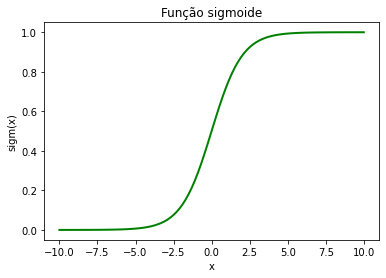

In [107]:
plt.plot(t,nn_test.sigmoid(t),linewidth=2,color='g')
plt.title('Função sigmoide')
plt.xlabel('x')
plt.ylabel('sigm(x)')

### Etapa III - Feedforward

### Etapa IV - Retropropagação dos erros

### Etapa V - Atualização dos pesos

In [108]:
# def relu(x):
#     return np.maximum(np.zeros(x.shape),x)

In [109]:
# x = np.array([[-5],[5]])
# relu(x)

### Etapa VI - Treinamento do modelo

In [110]:
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])
Y = np.array([[0, 1, 1, 0]])

#X = np.array([[0,0],[0,1],[1,0],[1,1]])
#Y = np.array([[0],[1],[1],[0]])

nn_test.train(X,Y,epochs=15,lr=0.2)

### Etapa VII - Generalização

In [111]:
X_test = np.array([[0],[0]])
print(nn_test.forward(X_test))

X_test = np.array([[0],[1]])
print(nn_test.forward(X_test))

X_test = np.array([[1],[0]])
print(nn_test.forward(X_test))

X_test = np.array([[1],[1]])
print(nn_test.forward(X_test))

[[0.37955677]]
[[0.56067145]]
[[0.51987131]]
[[0.52993415]]


In [112]:
nn_test.bias

{'hidden0': array([[ 0.10771644],
        [-0.01351666],
        [-0.00061761],
        [ 0.47245401]]),
 'output': array([[-0.16700559]])}

In [113]:
manual_weights = dict()
manual_bias = dict()
manual_weights['hidden0'] = np.array([[ 3.14708825, -3.02515284],
        [-3.48236268,  3.60001384]])
manual_weights['output'] = np.array([[-5.07678577, -5.01607987]])

manual_bias['hidden0'] = np.array([[1.43813902],
        [1.67767442]])
manual_bias['output'] = np.array([[4.49745273]])

nn_test.insert_layers(weights=manual_weights,bias=manual_bias)

In [58]:
nn_test.weights

{'hidden0': array([[ 3.14708825, -3.02515284],
        [-3.48236268,  3.60001384]]),
 'output': array([[-5.07678577, -5.01607987]])}

In [59]:
nn_test.neuron_out

{'hidden0': array([[ 0.02685013],
        [-0.09506326],
        [-0.74429866],
        [-0.7904864 ]]),
 'output': array([[0.29383826]])}

## Parte 2 - Framework para Redes Neurais


In [114]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.datasets import mnist

from tensorflow.keras.utils import to_categorical

import seaborn as sns 


In [117]:
print('Number of available GPUs')
len(tf.config.experimental.list_physical_devices('GPU'))

Number of available GPUs


1

In [118]:
(x_train, y_train), (x_test, y_test) = mnist.load_data(path="mnist.npz")

flatten_x_train = x_train.reshape(-1,28*28)
flatten_x_test = x_test.reshape(-1,28*28)

norm_x_train = flatten_x_train/255.0
norm_x_test = flatten_x_test/255.0

In [119]:
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Yt = encoder.transform(y_train)

encoded_Ytst = encoder.transform(y_test)

encoded_y_train = to_categorical(encoded_Yt)
encoded_y_test = to_categorical(encoded_Ytst)

In [120]:
n_input = flatten_x_train.shape[1]
n_output = encoded_y_train.shape[1]

In [121]:
def create_model(hidden_neurons = [4], hidden_activation = ['relu'], output_activation='softmax',lr=0.05):
    # create model
    model = Sequential()
    model.add(Dense(hidden_neurons[0], input_dim=n_input, activation='relu'))
    for i in range(1,len(hidden_neurons)):
        model.add(Dense(hidden_neurons[i], input_dim=hidden_neurons[i-1], activation='relu'))
        

    model.add(Dense(n_output, activation=output_activation))
    # Compile model
    opt = Adam(lr=lr)
    model.compile(
                    optimizer=tf.keras.optimizers.Adam(0.001),
                    loss=tf.keras.losses.CategoricalCrossentropy(),
                    metrics=[tf.keras.metrics.CategoricalAccuracy()])
    return model

In [122]:
model = create_model(hidden_neurons=[80],lr=0.1)

In [123]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                62800     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                810       
Total params: 63,610
Trainable params: 63,610
Non-trainable params: 0
_________________________________________________________________


In [124]:
model.fit(x=norm_x_train,y=encoded_y_train,epochs=60,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/60
48000/48000 [==============================] - 4s 88us/sample - loss: 0.3097 - categorical_accuracy: 0.9125 - val_loss: 0.1761 - val_categorical_accuracy: 0.9510
Epoch 2/60
48000/48000 [==============================] - 3s 69us/sample - loss: 0.1443 - categorical_accuracy: 0.9576 - val_loss: 0.1226 - val_categorical_accuracy: 0.9624
Epoch 3/60
48000/48000 [==============================] - 4s 87us/sample - loss: 0.1027 - categorical_accuracy: 0.9700 - val_loss: 0.1144 - val_categorical_accuracy: 0.9656
Epoch 4/60
48000/48000 [==============================] - 4s 73us/sample - loss: 0.0795 - categorical_accuracy: 0.9766 - val_loss: 0.0962 - val_categorical_accuracy: 0.9710
Epoch 5/60
48000/48000 [==============================] - 3s 70us/sample - loss: 0.0644 - categorical_accuracy: 0.9808 - val_loss: 0.0895 - val_categorical_accuracy: 0.9725
Epoch 6/60
48000/48000 [==============================] - 3s 70us/sample - loss: 0.05

In [125]:
Y_pred = model.predict(norm_x_test)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print('Classification Report')
target_names = ['0','1','2','3','4','5','6','7','8','9']
print(classification_report(y_test, y_pred, target_names=target_names))

Confusion Matrix
[[ 974    1    0    0    0    1    2    0    2    0]
 [   0 1126    1    2    0    1    2    3    0    0]
 [  10    5  984   14    1    0    0   12    6    0]
 [   0    0    0  993    0    7    1    3    4    2]
 [   0    1    2    2  950    1    7    4    1   14]
 [   4    1    0   10    0  867    6    1    2    1]
 [   4    3    1    0    5    2  941    2    0    0]
 [   0    5    6    4    1    0    0 1007    2    3]
 [   5    2    3    9    5    5    2    5  937    1]
 [   4    2    0   10    7    3    1    5    3  974]]
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.99      0.95      0.97      1032
           3       0.95      0.98      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       9

Text(0.5, 123.0, 'Predicted')

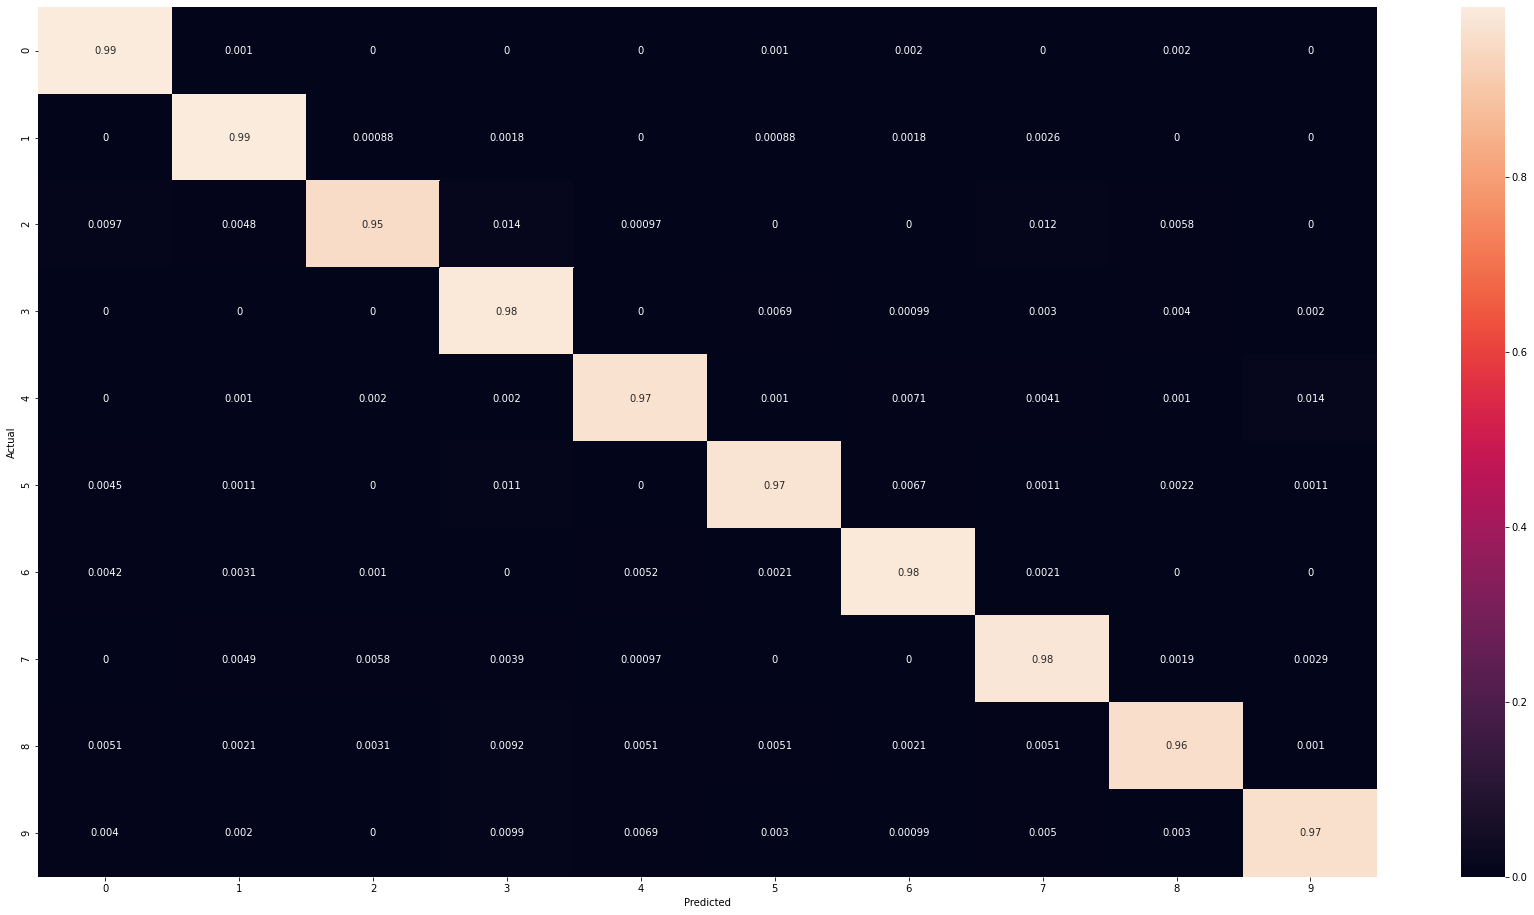

In [126]:
plt.figure(figsize=(30,16))
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cmn,annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')

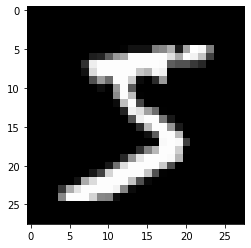

In [127]:
plt.imshow(flatten_x_train[0].reshape((28,28)),cmap='gray')